# Clustering of Nutrients Data

The Data consists of 7 Attributes.

The features are:
1. NAME
2. Calories
3. Protein
4. Fat
5. Calcium
6. Iron

The Target is:
1. Label

In this Notebook we explore:
1. Z-score to identify Outliers
2. Recursive Feature Elimination for identifying feature relevance
3. PCA for feature reductions

The following clustering models are used:
1. KMeans Clustering
2. Hierarchical Clustering

In [88]:
import pandas as pd
from scipy.stats import zscore
import warnings
import matplotlib
import matplotlib.pyplot as plt



matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

foods_df = pd.read_csv("../data/nutrients.csv", header=0)
columns = foods_df.columns

## Z-score
Z-score is the difference between the value and the sample mean expressed as the number of standard deviations. If the z-score is smaller than 2.5 or larger than 2.5, the value is in the 5% of smallest or largest values (2.5% of values at both ends of the distribution).

Frequency Evaluation of Calories

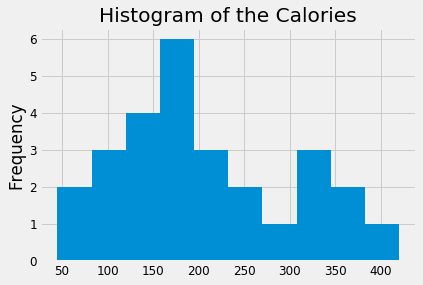

In [89]:
foods_df['Calories'].plot.hist(
  bins = 10,
  title = "Histogram of the Calories"
)

In [90]:
foods_df["calories_zscore"] = zscore(foods_df["Calories"])
foods_df["calories_is_outlier"] = foods_df["calories_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
calories_is_outlier = foods_df["calories_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[calories_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier


Frequency Evaluation of Proteins

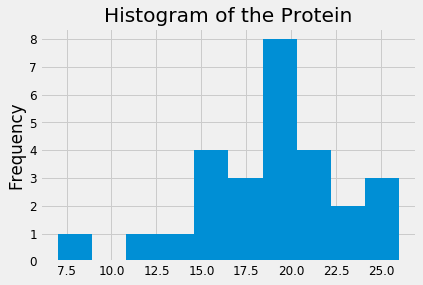

In [91]:
foods_df['Protein'].plot.hist(
  bins = 10,
  title = "Histogram of the Protein"
)

In [92]:
foods_df["protein_zscore"] = zscore(foods_df["Protein"])
foods_df["protein_is_outlier"] = foods_df["protein_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
protein_is_outlier = foods_df["protein_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[protein_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier
17,CLAMS CANNED,45,7,1,74,5.4,3,-1.635261,False,-2.876168,True


Frequency Evaluation of Fat

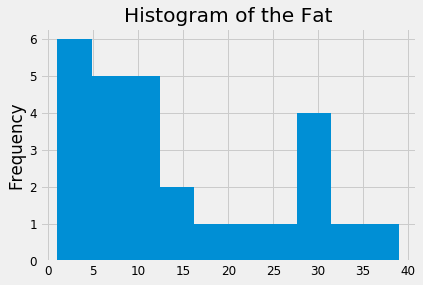

In [93]:
foods_df['Fat'].plot.hist(
  bins = 10,
  title = "Histogram of the Fat"
)

In [94]:
foods_df["fat_zscore"] = zscore(foods_df["Fat"])
foods_df["fat_is_outlier"] = foods_df["fat_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
fat_is_outlier = foods_df["fat_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[fat_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier,fat_zscore,fat_is_outlier


Frequency Evaluation of Calcium

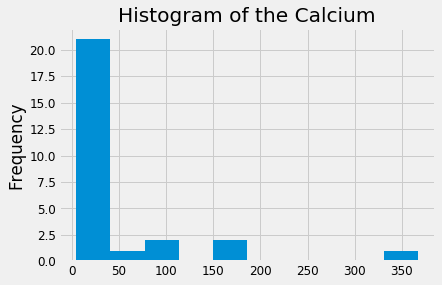

In [97]:
foods_df['Calcium'].plot.hist(
  bins = 10,
  title = "Histogram of the Calcium"
)

In [98]:
foods_df["calcium_zscore"] = zscore(foods_df["Calcium"])
foods_df["calcium_is_outlier"] = foods_df["calcium_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
calcium_is_outlier = foods_df["calcium_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[calcium_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier,fat_zscore,fat_is_outlier,calcium_zscore,calcium_is_outlier
24,SARDINES CANNED,180,22,9,367,2.5,3,-0.275962,False,0.719042,False,-0.405689,False,4.218541,True


Frequency Evaluation of Iron

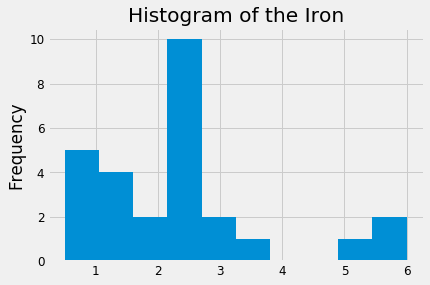

In [99]:
foods_df['Iron'].plot.hist(
  bins = 10,
  title = "Histogram of the Iron"
)

In [100]:
foods_df["iron_zscore"] = zscore(foods_df["Iron"])
foods_df["iron_is_outlier"] = foods_df["iron_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
iron_is_outlier = foods_df["iron_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[iron_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier,fat_zscore,fat_is_outlier,calcium_zscore,calcium_is_outlier,iron_zscore,iron_is_outlier
16,CLAMS RAW,70,11,1,82,6.0,3,-1.383539,False,-1.917445,False,-1.129893,False,0.496726,False,2.523394,True


## RFE (Recursive Feature Elimination)
It removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class).

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

foods_df = pd.read_csv("../data/nutrients.csv", header=0)

# checking for missing values
# get total number of missing values in the dataset
foods_df.isna().sum()

features = ['Calories', 'Protein', 'Fat', 'Calcium', 'Iron']
# Separating out the features
X = foods_df.loc[:, features].values
# Separating out the target
y = foods_df.loc[:,['Label']].values

In [102]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,5)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.436002


In [104]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Feature Selection
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 3)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True]
[2 1 1 3 1]


## PCA (Principal Component Analysis)
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

### Standardization
PCA is effected by scale so you need to scale the features in your data before applying PCA

In [105]:
# Standardizing the features
x = StandardScaler().fit_transform(X)

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, foods_df[['Label']]], axis = 1)
finalDf

,principal component 1,principal component 2,Label
0,1.894907,0.318029,1
1,0.659812,-0.079563,1
2,2.936755,1.122724,1
3,2.321069,0.585663,1
4,-0.256477,0.054382,1
5,-0.932996,-0.905719,2
6,-0.185016,-1.564189,2
7,-0.699024,0.346282,3
8,0.937389,0.108904,1
9,1.409838,0.415262,1


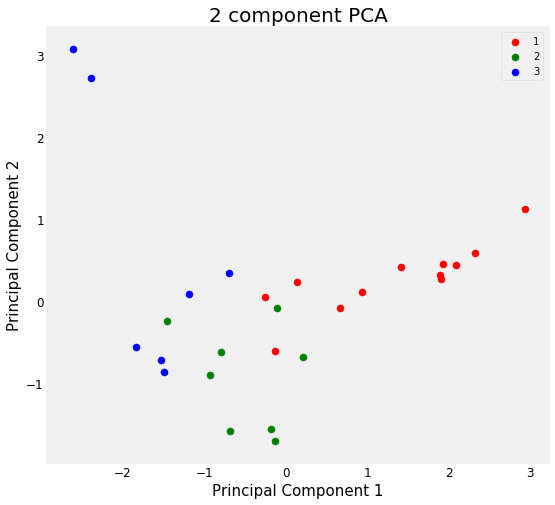

In [107]:
# plotting a scatter plot to see the 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [108]:
# Remove the identified outliers
principalDf = principalDf.drop([16, 17])
foods_df = foods_df.drop([16, 17])

## KMEANs Clustering

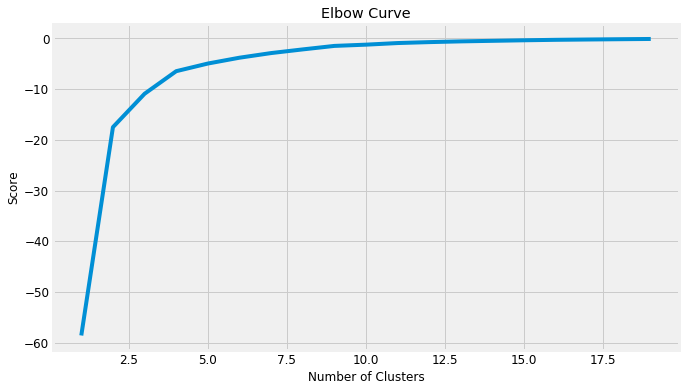

0.52


In [111]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array(principalDf.astype(float))
y = np.array(foods_df['Label'])

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, max_iter=5000, algorithm = 'auto').fit(X) for i in n_cluster]
scores = [kmeans[i].score(X) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans = KMeans(n_clusters=3, max_iter=5000, algorithm = 'auto') # You want cluster the passenger records into 5: Each of the nutrient groups
y_kmeans = kmeans.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

## Hierarchical Clustering

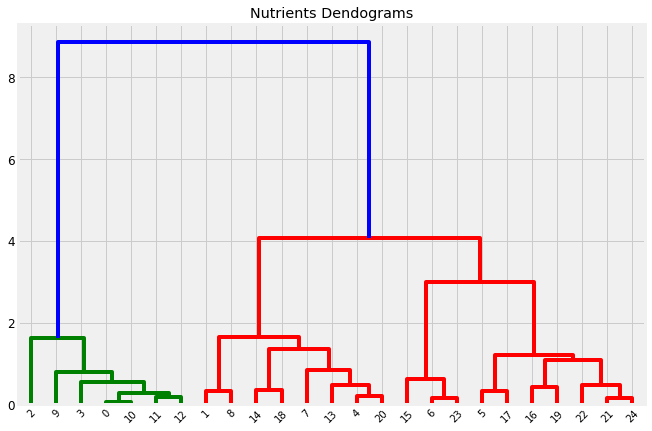

In [115]:
import matplotlib.pyplot as plt  
%matplotlib inline

import scipy.cluster.hierarchy as shc
# plot to identify clusters in the dataset
plt.figure(figsize=(10, 7))  
plt.title("Nutrients Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

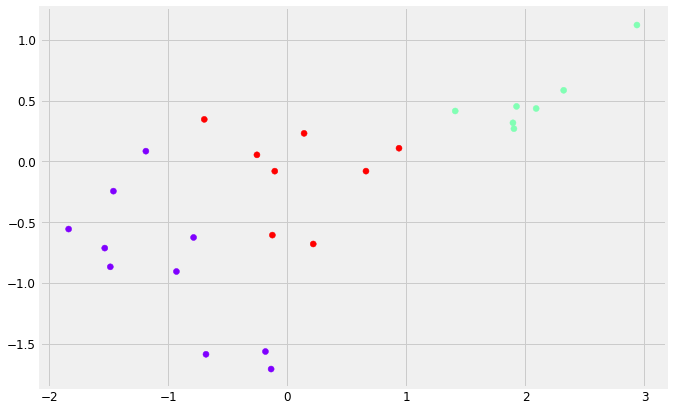

In [114]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

# plot the actual clusters 
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')  
